In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 
import matplotlib.mlab as mlab
import seaborn as sns
#import pymc3 as pm
from numpy.linalg import inv, solve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from IPython.display import display
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import truncnorm
#from sklearn.model_selection import cross_val_score

In [3]:
#Read csv file and get the outputs(features) and inputs
features = ['SN112EK42.5', 'SN112EK47.5', 'SN112EK52.5', 'SN112EK57.5', 'SN112EK62.5', 'SN112EK67.5', 'SN112EK72.5', 'SN112EK77.5', 'SN112EK82.5', 'SN112EK87.5', 'SN124EK42.5', 'SN124EK47.5', 'SN124EK52.5', 'SN124EK57.5', 'SN124EK62.5', 'SN124EK67.5', 'SN124EK72.5', 'SN124EK77.5', 'SN124EK82.5', 'SN124EK87.5', 'DREK12.5', 'DREK17.5', 'DREK22.5', 'DREK27.5', 'DREK32.5', 'DREK37.5', 'DREK42.5', 'DREK47.5', 'DREK52.5', 'DREK60.0', 'DREK70.0', 'DREK80.0', 'DREK87.5']
inputs = ['S0', 'L', 'ms', 'mv']
error_features = ['SN112EK42.5_Error', 'SN112EK47.5_Error', 'SN112EK52.5_Error', 'SN112EK57.5_Error', 'SN112EK62.5_Error', 'SN112EK67.5_Error', 'SN112EK72.5_Error', 'SN112EK77.5_Error', 'SN112EK82.5_Error', 'SN112EK87.5_Error', 'SN124EK42.5_Error', 'SN124EK47.5_Error', 'SN124EK52.5_Error', 'SN124EK57.5_Error', 'SN124EK62.5_Error', 'SN124EK67.5_Error', 'SN124EK72.5_Error', 'SN124EK77.5_Error', 'SN124EK82.5_Error', 'SN124EK87.5_Error', 'DREK12.5_Error', 'DREK17.5_Error', 'DREK22.5_Error', 'DREK27.5_Error', 'DREK32.5_Error', 'DREK37.5_Error', 'DREK42.5_Error', 'DREK47.5_Error', 'DREK52.5_Error', 'DREK60.0_Error', 'DREK70.0_Error', 'DREK80.0_Error', 'DREK87.5_Error'
]
df = pd.read_csv("C:/Users/danny/bayesian_example/e120_bugfix_model_new_mv.csv", usecols=features)
df2 = pd.read_csv("C:/Users/danny/bayesian_example/e120_bugfix_model_new_mv.csv", usecols=inputs)
df3 = pd.read_csv("C:/Users/danny/bayesian_example/e120_exp_result.csv", usecols=features)
df4 = pd.read_csv("C:/Users/danny/bayesian_example/e120_exp_result.csv", usecols=error_features)

In [6]:
#importing output from spreadsheet
y = df.loc[:, features].values
#scaling the data
#y_scaler = MinMaxScaler().fit_transform(y)
#y_scaler = Normalizer().fit_transform(y)
#y_scaler = RobustScaler().fit_transform(y)
#y_scaler = StandardScaler().fit_transform(y)
pd.DataFrame(data = y, columns = features).head()

,SN112EK42.5,SN112EK47.5,SN112EK52.5,SN112EK57.5,SN112EK62.5,SN112EK67.5,SN112EK72.5,SN112EK77.5,SN112EK82.5,SN112EK87.5,...,DREK27.5,DREK32.5,DREK37.5,DREK42.5,DREK47.5,DREK52.5,DREK60.0,DREK70.0,DREK80.0,DREK87.5
0,1.049740,1.009370,0.971587,0.933543,0.895236,0.860123,0.828202,0.797841,0.769038,0.742806,...,1.25778,1.28492,1.31206,1.33919,1.36544,1.39081,1.42918,1.47076,1.50127,1.51709
1,1.101460,1.076550,1.053560,1.032650,1.013830,0.995491,0.977648,0.959740,0.941767,0.928342,...,1.23401,1.26444,1.29513,1.32608,1.36158,1.40161,1.45320,1.51812,1.59659,1.65511
2,1.033870,0.999617,0.967117,0.937034,0.909368,0.884840,0.863449,0.842654,0.822455,0.805631,...,1.25178,1.27908,1.30598,1.33249,1.36163,1.39341,1.43365,1.48005,1.51807,1.54192
3,0.979704,0.948603,0.921646,0.900123,0.884032,0.867298,0.849921,0.837539,0.830154,0.821927,...,1.23993,1.26528,1.29176,1.31937,1.34603,1.37173,1.40500,1.44910,1.48531,1.50366
4,1.026250,0.998031,0.974097,0.951106,0.929057,0.908939,0.890750,0.876159,0.865163,0.855486,...,1.21375,1.23669,1.26262,1.29155,1.32245,1.35531,1.40611,1.47931,1.54623,1.59240


In [7]:
#applying PCA on the outputs and reducing it from 33D to 3D
pca = PCA(n_components=3)
yPCA = pca.fit_transform(y)
PCADf = pd.DataFrame(data = yPCA, columns = ['PCA 1', 'PCA 2', 'PCA 3'])
PCADf.head()

,PCA 1,PCA 2,PCA 3
0,0.004585,0.189818,-0.017025
1,-0.889633,0.023971,0.013887
2,-0.174100,0.061279,-0.026724
3,-0.011284,-0.096832,-0.013462
4,-0.320008,-0.111562,0.062695


In [60]:
G = np.dot(yPCA, pca.components_) + pca.mean_
print('PCA explained')
print(pca.explained_variance_ratio_) 
print('-----------------------------------') 
print('Testing if the reverse pca works')
print(G)

PCA explained
[0.95664316 0.03929512 0.00237127]
-----------------------------------
Testing if the reverse pca works
[[1.05226638 1.00984326 0.96921742 ... 1.46182261 1.48709511 1.50213919]
 [1.10304362 1.0782522  1.05524568 ... 1.52386133 1.59330332 1.64266425]
 [1.03278436 0.99840936 0.96670162 ... 1.47629668 1.51377543 1.53713317]
 ...
 [0.95791579 0.90589328 0.85745636 ... 1.38459667 1.38846038 1.38896563]
 [1.01619208 0.95436387 0.89447893 ... 1.3714765  1.37153888 1.37266782]
 [0.99489351 0.96558251 0.94040069 ... 1.45655175 1.51113185 1.55003265]]


In [10]:
#importing inputs from spreadsheet
x = df2.loc[:, inputs].values
xdf = pd.DataFrame(data = x, columns = ['S0', 'L', 'ms', 'mv'])
xdf.head()

,S0,L,ms,mv
0,31.159,43.5,0.980,0.865000
1,35.073,56.1,0.700,0.875000
2,32.395,66.9,0.860,0.855000
3,28.275,86.7,0.972,1.095001
4,27.657,79.5,0.612,0.975000


In [11]:
#using sckitlearn to do the gaussian process
kernel = RBF() #squared exponential 
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=0)
gp.fit(x, yPCA) #fitting the data
gp.score(x, yPCA)

1.0

D:\Users\danny\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


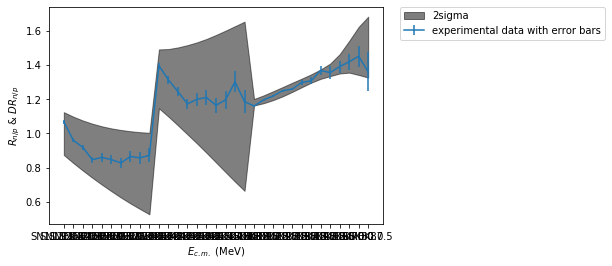

In [51]:
#creating the 2sigma prior in figure 1
Samples = 500 #number of new random inputs created
def get_truncated_normal(mean=0.7, sd=0.05, low=0.6, upp=1):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
mMS = get_truncated_normal(mean =0.7, sd =0.05, low=0.6, upp=1) #using guassian distribution with set range to create ms
MMS = mMS.rvs(Samples)
mMV = np.random.uniform(0.6,1.2,Samples) #using a uniform distribution with set range to create mv
ss0 = np.random.uniform(25.7,36,Samples) #using a uniform distribution with set range to create S0
ll = np.random.uniform(32,120,Samples) #using a uniform distribution with set range to create L

#shaping the newly generated inputs to look like the inputs from the spreadsheet
ss0 = ss0.reshape(Samples,1)
mMV = mMV.reshape(Samples,1)
MMS = MMS.reshape(Samples,1)
ll = ll.reshape(Samples,1)
xx_ = np.concatenate((ss0,ll),axis=1)
xxx_ = np.concatenate((MMS,mMV),axis=1)
X_ = np.concatenate((xx_,xxx_),axis=1) 

#using the gaussian process model to predict new output for each sample
#using reverse PCA to go back to 33 features
Y_pred, Y_std = gp.predict(X_, return_std=True)
y_2 = np.dot(Y_pred, pca.components_) + pca.mean_
y2_preddf = pd.DataFrame(data = y_2, columns =  features)
y2_preddf.head()

#finding the mean and std of each feature
y2_mean = y2_preddf[features].mean()
sigma =  np.std(y2_preddf[features])
sigma = 2*sigma

#plotting the 2*sigma and experimental data based on energy E_c.m. for example the column SN112EK42.5 represent energy 42.5 
y_ex_std =df4.loc[:,error_features].values
y_ex_std = y_ex_std.reshape(33,1)
Y_ex = df3.loc[:, features].values
Y_ex = Y_ex.reshape(33,1)
exp_data = plt.errorbar(features,Y_ex, yerr = y_ex_std, label ='experimental data with error bars')
two_sigma = plt.fill_between(features, y2_mean + sigma,y2_mean -sigma, alpha=0.5, color='k', label='2sigma')
plt.xlabel('$E_{c.m.}$ (MeV)')
plt.ylabel('$R_{n/p}$ & $DR_{n/p}$')
plt.legend([exp_data,two_sigma],['exp_data','two_sigma'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

$Like = exp(-\sum \frac{(y(x) - y_{exp})^2}{2\sigma^2})$ 

$like = e^{-(y(x)-y_{exp})(YcovM)(y(x)-y_{exp}).T}$

$YcovM = Ycov - Y_{experror}I$

In [64]:
#Creating the Likelihood
#Creating random generated inputs based on parameters from paper
MS = get_truncated_normal( mean =0.7, sd =0.05, low=0.6, upp=1)
MS.rvs()
MV = np.random.uniform(0.6,1.2)
s0 = np.random.uniform(25.7,36)
l = np.random.uniform(32,120)

#reshaping inputs to look like orignal inputs form spreadsheet
x_ =np.matrix([s0,l,MS.rvs(),MV])
x_df = pd.DataFrame(data = x_, columns =  ['S0', 'L', 'ms', 'mv'])
x_df.head()

#using the gp model trained on orignal inputs on the new inputs to predict a new output
y_pred, y_std = gp.predict(x_, return_std=True)
y_preddf = pd.DataFrame(data = y_pred, columns =  ['PCA 1', 'PCA 2', 'PCA 3'])
y_preddf.head()
y_std = (y_std**2)*np.eye(3)
print('shape of y_pred')
print(y_pred.shape)
print('----------------')
print('shape of y_std')
print(y_std.shape)

#Reverse PCA on y_pred to look like y and finding the covariance matrix
y_1 = np.dot(y_pred, pca.components_) + pca.mean_
covM = np.dot(np.dot(pca.components_.T,y_std),pca.components_)
print('----------------')
print('shape of covM')
print(covM.shape)

#calculating the likelihood function
COV = covM - y_exp_std*np.eye(33)
Z = y_1-Y_exp
ZIG = solve(COV,Z.T) #This method is used instead of inv() for the covM is small and might create a problem
J = np.dot(Z,ZIG)
like = np.exp(-J)
print('-----------------')
print('likelihood funciton')
print(like)

shape of y_pred
(1, 3)
----------------
shape of y_std
(3, 3)
----------------
shape of covM
(33, 33)
-----------------
likelihood funciton
[[8.25382965e+20]]


$Posterior = \frac{Like*S0*L*ms*mv}{\sum(like*(S0+L+ms+mv)}
\\
\\
posterior \propto Like*S0*L*ms*mv$

In [46]:
#MCMC code

N = 1000 #MCMC trials

#size of step taken
met_step = 0.001
met_step2 = 0.001
met_step3 = 0.01
met_accept = 0

#empty arrays to store data
S0 = np.zeros(N)
L = np.zeros(N)
ms = np.zeros(N)
mv = np.zeros(N)
mus = np.zeros(N)
mul = np.zeros(N)
#lik = np.zeros(N)

#initial starting points
S0[0] = 30
L[0] = 70
mus[0] = 0.8
mv[0] = 1
#lik[0] = 0.9
#mul[0] = 1

#setting up random generated number for later use
uni1 = np.random.rand()
uni2 = np.random.rand()
uni3 = np.random.rand()
uni4 = np.random.rand()


for i in range(N-1):
    
    #Here lies the random walk
    if uni1 > 0.5:
        S0_c = S0[i] + uniform(0,met_step).rvs()
    else:
        S0_c = S0[i] - uniform(0,met_step).rvs()
    if uni2 > 0.5:   
        L_c = L[i] + uniform(0,met_step).rvs()
    else:
        L_c = L[i] - uniform(0,met_step).rvs()
    if uni3 > 0.5:
        mv_c = mv[i] + uniform(0,met_step2).rvs()
    else:
        mv_c = mv[i] - uniform(0,met_step2).rvs()
     
    #mul_c = norm(mul[i],met_step3).rvs() 
    mus_c = norm(mus[i],met_step3).rvs()    
    ms_i = norm(0.7, 0.05).pdf(mus[i])
    ms_c = norm(0.7, 0.05).pdf(mus_c)
    
    Z1 = np.random.rand()*0.1
    Z2 = np.random.rand()*0.01
    Z3 = np.random.rand()*0.001
    mul[0] = mus[0] + mv[0]*Z1 + S0[0]*Z2 + L[0]*Z3
    mul_c = ms_c + mv_c*Z1 + S0_c*Z2 + L_c*Z3
    
    lik_i = norm(mul[i],0.028).pdf(data).prod()
    lik_c = norm(mul_c,0.028).pdf(data).prod()
    
    #constraints are added so that the random walk doesn't go beyond the parameters in the paper
    constraints = [0.6<=ms_c<=1,
                 0.6<mv_c<1.2,
                 25.7<S0_c<36,
                 32<=L_c<=120]
    #metropolis algorathem
    if all(constraints):
        met_r = lik_c*S0_c*L_c*ms_c*mv_c/lik_i*S0[i]*L[i]*ms_i*mv[i]
        if uni4 <= min(1,met_r):
            S0[i+1] = S0_c
            L[i+1] = L_c
            mul[i+1] = mul_c
            mus[i+1] = mus_c
            mv[i+1] = mv_c
            ms[i] = ms_c
            #lik[i] = lik_c
            met_accept = met_accept +1
        else:
            S0[i+1] = S0[i]
            L[i+1] = L[i]
            mus[i+1] = mus[i]
            mul[i+1] = mul[i]
            mv[i+1] = mv[i]
            ms[i] = ms_i
            #lik[i] = lik_i
    else:
        S0[i+1] = S0[i]
        L[i+1] = L[i]
        mul[i+1] = mul[i]
        mus[i+1] = mus[i]
        mv[i+1] = mv[i]
        ms[i] = ms_i
        #lik[i] = lik_i
        
#acceptance rate        
M = met_accept/N
print(M)

D:\Users\danny\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in double_scalars


0.0416


In [44]:
#Using the MCMC sampling figure 2 can be created using all the plots below
#plt.hist(S0,30, range = (10,40))
#plt.hist(L,30, range=(30,120))
#plt.hist(ms,30,range =(0.6,1))
#plt.hist(mv,100, range = (0.6,1.2))
#plt.hist2d(ms,mv)
#plt.hist2d(ms,L)
#plt.hist2d(ms,S0)
#plt.hist2d(mv,ms)
#plt.hist2d(mv,L)
#plt.hist2d(mv,S0)
#plt.hist2d(L,ms)
#plt.hist2d(L,mv)
#plt.hist2d(L,S0)
#plt.hist2d(S0,mv)
#plt.hist2d(S0,L)
#plt.hist2d(S0,ms)
#pm.traceplot(trace)
#plt.plot(L)

D:\Users\danny\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


inf


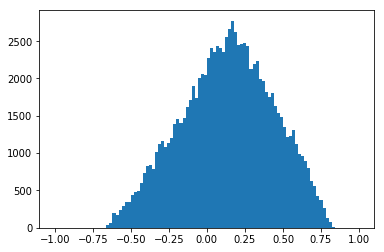

In [29]:
#using the ms and mv sampling from mcmc, figure 3 can be created
fI = 1/ms - 1/mv
plt.hist(fI, 100, range=(-1,1))
print(fI.mean())

In [97]:
#reshaping the sampling from mcmc to look like the inputs
S0 = S0.reshape(N,1)
L = L.reshape(N,1)
ms = ms.reshape(N,1)
mv = mv.reshape(N,1)
SL = np.concatenate((S0,L),axis=1)
msv = np.concatenate((ms,mv),axis=1)
x_mcmc = np.concatenate((SL,msv),axis=1)
x_MCMC = pd.DataFrame(data = x_mcmc, columns =  ['S0', 'L', 'ms', 'mv'])
x_MCMC.head()

,S0,L,ms,mv
0,30.000000,70.000000,1.079819,1.000000
1,30.000000,70.000000,0.684094,1.000000
2,30.788374,70.141137,0.737421,1.023541
3,31.319453,70.521572,0.737421,1.026640
4,31.319453,70.521572,0.737421,1.026640


In [ ]:
#using the trained gaussian process to predict a new y based on the mcmc sampling. This new y will be the posterior
y_mcmc = gp.predict(x_mcmc, return_std=True)
#Reverse PCA on y_mcmc to look like y
Y_mcmc = np.dot(y_mcmc, pca.components_) + pca.mean_
Y_mcmcdf= pd.DataFrame(data = Y_mcmc, columns =  features)
Y_mcmcdf.head()

In [ ]:
#posterior mean
Y_mcmc_mean = Y_mcmcdf[features].mean()

In [ ]:
#here figure 1 is created
#plotting the Y_mcmc based on energy E_c.m. for example the column SN112EK42.5 represent energy 42.5 
Yy_mcmc = np.array([Y_mcmc[:,0],Y_mcmc[:,1],Y_mcmc[:,2],Y_mcmc[:,3],Y_mcmc[:,4],Y_mcmc[:,5],Y_mcmc[:,6],Y_mcmc[:,7],Y_mcmc[:,8],Y_mcmc[:,9],Y_mcmc[:,10],Y_mcmc[:,11],Y_mcmc[:,12],Y_mcmc[:,13],Y_mcmc[:,14],Y_mcmc[:,15],Y_mcmc[:,16],Y_mcmc[:,17],Y_mcmc[:,18],Y_mcmc[:,19],Y_mcmc[:,20],Y_mcmc[:,21],Y_mcmc[:,22],Y_mcmc[:,23],Y_mcmc[:,24],Y_mcmc[:,25],Y_mcmc[:,26],Y_mcmc[:,27],Y_mcmc[:,28],Y_mcmc[:,29],Y_mcmc[:,30],Y_mcmc[:,31],Y_mcmc[:,32]])
plt.plot(features,Yy_mcmc, 'g')
plt.plot(features, Y_mcmc_mean, 'k')
plt.plot(features,Yy, 'r')
plt.errorbar(features,Y_ex, yerr = y_ex_std)
plt.xlabel('$E_{c.m.}$ (MeV)')
plt.ylabel('$R_{n/p}$ & $DR_{n/p}$')

#attempt at using Pymc3
basic_model = pm.Model()

X1 =np.random.randn()*0.001
X2 =np.random.randn()*0.5
X3 =np.random.randn()*0.01

with basic_model:
    sS0 = pm.Uniform('S0',lower =25.7,upper =36)
    lL = pm.Uniform('L', lower =32, upper =120)
    mms = pm.Normal('ms', mu=0.7,sigma=0.05)
    mmv = pm.Uniform('mv', lower = 0.6, upper =1.2)
    
    mu_like = mms + sS0*X3 + lL*X1 + mmv*X2
    
    LIK = pm.Normal('LIK',mu=mu_like,sigma=0.008, observed = like)
    
    trace = pm.sample(10000)